In [ ]:
###Topic-Healthcare
##Dataset collected from  UCI Machine Learning Repository
##https://docs.google.com/spreadsheets/d/1yxpEkShmbnRQkoojXqUyaz6yCnJTT1k80UDDn3t42P0/edit?gid=709156997#gid=709156997
##Goal of the project-Predicting patient satisfaction based on services offered, professional care, communication.
# The dataset is based on patient surveys from home health agencies, which are directly related to healthcare. It includes ratings and feedback on various aspects of healthcare services, such as communication, professional behavior, and overall satisfaction.
# This makes it a relevant dataset for healthcare projects, especially if your focus is on patient satisfaction or service quality improvement.

# Importing necessary libraries
# 1. pandas and numpy
# pandas: Used for data manipulation and analysis. It helps you load, explore, and preprocess the dataset.
# numpy: Provides support for numerical operations, which will be used for handling arrays and mathematical operations.
# 2. matplotlib.pyplot and seaborn
# matplotlib: Used for plotting and visualizing data.
# seaborn: Built on top of matplotlib, it provides an easier and more aesthetically pleasing way to create plots.
# 3. OneHotEncoder from sklearn.preprocessing
# OneHotEncoder: Useful for converting categorical variables into numeric format (one-hot encoding), which is required for m
# any machine learning algorithms.
# StandardScaler : It rescales the data to have a mean of 0 and a standard deviation of 1
# train_test_split : one of the most important process in data preprocessing involves splitting the data set into train and test set. By doing this we can enhance the performance of our model and hence provide better predictability

In [10]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#1. Load the Dataset
df = pd.read_csv('Health_Care_Patient_survey.csv')
df

,State,CMS Certification Number (CCN)*,Provider Name,Address,City,Zip,Phone,Type of Ownership,Offers Nursing Care Services,Offers Physical Therapy Services,...,Star Rating for how patients rated overall care from agency,Footnote for Star Rating for overall care from agency,Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),Footnote for percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),"Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family","Footnote for percent of patients who reported YES, they would definitely recommend the home health agency to friends and family",Number of completed Surveys,Footnote for number of completed surveys,Response rate,Footnote for response rate
0,AL,17000,BUREAU OF HOME & COMMUNITY SERVICES ...,"201 MONROE STREET, THE RSA TOWER, SUITE 1200 ...",MONTGOMERY,36104,3342065341,Official Health Agency,True,True,...,NaN,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.
1,AL,17008,JEFFERSON COUNTY HOME CARE ...,2201 ARLINGTON AVENUE ...,BESSEMER,35020,2059169500,Official Health Agency,True,True,...,3.0,Fewer than 100 patients completed the survey. ...,86,Fewer than 100 patients completed the survey. ...,68,Fewer than 100 patients completed the survey. ...,58,Fewer than 100 patients completed the survey. ...,24,Fewer than 100 patients completed the survey. ...
2,AL,17009,ALACARE HOME HEALTH & HOSPICE ...,2970 LORNA ROAD ...,BIRMINGHAM,35216,2058242680,Local,True,True,...,5.0,NaN,91,NaN,86,NaN,348,NaN,34,NaN
3,AL,17013,GENTIVA HEALTH SERVICES ...,"557 GLOVER STREET, SUITE 5 ...",ENTERPRISE,36330,3343470234,Official Health Agency,True,True,...,4.0,NaN,89,NaN,90,NaN,248,NaN,38,NaN
4,AL,17014,AMEDISYS HOME HEALTH ...,68278 MAIN STREET ...,BLOUNTSVILLE,35031,2054294919,Local,True,True,...,4.0,NaN,85,NaN,86,NaN,159,NaN,31,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12154,TX,747970,"ROSE OF SHARON HOME HEALTH, INC. ...",109 EAST HOUSTON AVENUE ...,CROCKETT,75835,7133677275,Local,True,True,...,NaN,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.
12155,TX,747971,"SACRED CARE HOME HEALTH, LLC ...",222 W BURLESON ...,WHARTON,77488,9795313068,Local,True,True,...,NaN,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.
12156,TX,747972,"ALL DAY HEALTHCARE, INC. ...","330 MAIN STREET, SUITE #1B ...",SEALY,77474,9795894084,Local,True,True,...,NaN,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.
12157,TX,747973,BRUSHY CREEK HOME HEALTH AGENCY INC ...,608 MORROW ST STE 105 ...,AUSTIN,78752,5123236175,Local,True,True,...,NaN,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available 

In [7]:
# View the first few rows
df.head()

,State,CMS Certification Number (CCN)*,Provider Name,Address,City,Zip,Phone,Type of Ownership,Offers Nursing Care Services,Offers Physical Therapy Services,...,Star Rating for how patients rated overall care from agency,Footnote for Star Rating for overall care from agency,Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),Footnote for percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),"Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family","Footnote for percent of patients who reported YES, they would definitely recommend the home health agency to friends and family",Number of completed Surveys,Footnote for number of completed surveys,Response rate,Footnote for response rate
0,AL,17000,BUREAU OF HOME & COMMUNITY SERVICES ...,"201 MONROE STREET, THE RSA TOWER, SUITE 1200 ...",MONTGOMERY,36104,3342065341,Official Health Agency,True,True,...,NaN,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.
1,AL,17008,JEFFERSON COUNTY HOME CARE ...,2201 ARLINGTON AVENUE ...,BESSEMER,35020,2059169500,Official Health Agency,True,True,...,3.0,Fewer than 100 patients completed the survey. ...,86,Fewer than 100 patients completed the survey. ...,68,Fewer than 100 patients completed the survey. ...,58,Fewer than 100 patients completed the survey. ...,24,Fewer than 100 patients completed the survey. ...
2,AL,17009,ALACARE HOME HEALTH & HOSPICE ...,2970 LORNA ROAD ...,BIRMINGHAM,35216,2058242680,Local,True,True,...,5.0,NaN,91,NaN,86,NaN,348,NaN,34,NaN
3,AL,17013,GENTIVA HEALTH SERVICES ...,"557 GLOVER STREET, SUITE 5 ...",ENTERPRISE,36330,3343470234,Official Health Agency,True,True,...,4.0,NaN,89,NaN,90,NaN,248,NaN,38,NaN
4,AL,17014,AMEDISYS HOME HEALTH ...,68278 MAIN STREET ...,BLOUNTSVILLE,35031,2054294919,Local,True,True,...,4.0,NaN,85,NaN,86,NaN,159,NaN,31,NaN


In [6]:
# Get summary of data including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12159 entries, 0 to 12158
Data columns (total 39 columns):
 #   Column                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                             --------------  -----  
 0   State                                                                                                                              12159 non-null  object 
 1   CMS Certification Number (CCN)*                                                                                                    12159 non-null  int64  
 2   Provider Name                                                                                                                      12159 non-null  object 
 3   Address                                                                               

In [7]:
# Summary statistics for numeric columns
df.describe()

,CMS Certification Number (CCN)*,Zip,Phone,HHCAHPS Survey Summary Star Rating,Star Rating for health team gave care in a professional way,Star Rating for health team communicated well with them,"Star Rating team discussed medicines, pain, and home safety",Star Rating for how patients rated overall care from agency
count,12159.000000,12159.000000,1.215900e+04,5740.000000,5740.000000,5740.000000,5740.000000,5740.000000
mean,326171.615182,57901.661732,6.028284e+09,3.668641,3.891289,3.979617,3.075958,3.151045
std,226214.421878,25335.435766,2.498248e+09,0.950212,1.012740,1.001185,1.068395,1.104730
min,17000.000000,601.000000,2.012916e+09,1.000000,1.000000,1.000000,1.000000,1.000000
25%,117094.000000,35963.500000,3.308363e+09,3.000000,3.000000,4.000000,2.000000,2.000000
50%,267655.000000,60607.000000,6.182779e+09,4.000000,4.000000,4.000000,3.000000,3.000000
75%,459232.500000,77478.000000,8.181149e+09,4.000000,5.000000,5.000000,4.000000,4.000000
max,747974.000000,99901.000000,9.898949e+09,5.000000,5.000000,5.000000,5.000000,5.000000


In [4]:
# 2. Handle Missing Data
missing_data = df.isnull().sum()  # Identify missing values
print("\nMissing Values:\n", missing_data[missing_data > 0])


Missing Values:
 HHCAHPS Survey Summary Star Rating                                                                                                   6419
Footnote HHCAHPS Survey Summary Star Rating                                                                                          3441
Star Rating for health team gave care in a professional way                                                                          6419
Footnote for Star Rating for gave care in a professional way                                                                         3441
Footnote for percent of patients who reported that their home health team gave care in a professional way                            3441
Star Rating for health team communicated well with them                                                                              6419
Footnote for Star Rating for communicated well with them                                                                             3441
Footnote for per

In [ ]:
# Impute missing numerical data with mean, categorical data with mode
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

In [6]:
# 3. Handle Duplicates
duplicates = df.duplicated().sum()  # Check for duplicate rows
print("\nNumber of duplicate rows:", duplicates)
df = df.drop_duplicates()  # Remove duplicate rows   


Number of duplicate rows: 0


In [7]:
# 4. Data Transformation
# Encode categorical variables using pd.get_dummies()
df_encoded = pd.get_dummies(df, drop_first=True)


In [11]:
# Scale numerical features using StandardScaler
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_scaled = df_encoded.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])


In [12]:
# 5. Handle Outliers (using Z-score)
from scipy import stats

z_scores = np.abs(stats.zscore(df_scaled[numeric_cols]))
outliers = (z_scores > 3).sum()
print("\nNumber of outliers detected in numeric columns:\n", outliers)



Number of outliers detected in numeric columns:
 CMS Certification Number (CCN)*                                  0
Zip                                                              0
Phone                                                            0
HHCAHPS Survey Summary Star Rating                              88
Star Rating for health team gave care in a professional way     94
Star Rating for health team communicated well with them        131
Star Rating team discussed medicines, pain, and home safety      0
Star Rating for how patients rated overall care from agency      0
dtype: int64


In [14]:
# remove outliers
df_cleaned = df_scaled[(z_scores < 3).all(axis=1)]
df_cleaned

,CMS Certification Number (CCN)*,Zip,Phone,Offers Nursing Care Services,Offers Physical Therapy Services,Offers Occupational Therapy Services,Offers Speech Pathology Services,Offers Medical Social Services,Offers Home Health Aide Services,HHCAHPS Survey Summary Star Rating,...,Response rate_72,Response rate_74,Response rate_8,Response rate_83,Response rate_9,Response rate_Not Available,Footnote for response rate_No survey results are available for this period.,Footnote for response rate_Survey results are based on less than 12 months of data.,Footnote for response rate_There were problems with the data and they are being corrected.,"Footnote for response rate_Zero, or very few, patients met the surveys rules for inclusion. The scores shown, if any, reflect a very small number of surveys and may not accurately tell how an agency is doing."
0,-1.366776,-0.860398,-1.075285,True,True,True,True,True,True,6.802690e-16,...,False,False,False,False,False,True,True,False,False,False
1,-1.366740,-0.903186,-1.588825,True,True,True,True,True,True,-1.024244e+00,...,False,False,False,False,False,False,False,False,False,False
2,-1.366736,-0.895449,-1.589196,True,True,True,True,True,True,2.039415e+00,...,False,False,False,False,False,False,True,False,False,False
3,-1.366718,-0.851477,-1.074723,True,True,True,False,False,True,2.039415e+00,...,False,False,False,False,False,False,True,False,False,False
4,-1.366714,-0.902751,-1.590776,True,True,True,True,True,True,5.075854e-01,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12154,1.864672,0.707865,0.442486,True,True,True,True,True,True,6.802690e-16,...,False,False,False,False,False,True,True,False,False,False
12155,1.864677,0.773113,1.507931,True,True,True,True,True,True,6.802690e-16,...,False,False,False,False,False,True,True,False,False,False
12156,1.864681,0.772560,1.508163,True,True,True,True,True,False,6.802690e-16,...,False,False,False,False,False,True,True,False,False,False
12157,1.864685,0.823005,-0.362288,True,True,True,True,True,True,6.802690e-16,...,False,False,False,False,False,True,True,False,False,False


In [15]:
# 6. Split the Data into Train/Test sets
X = df_cleaned.drop('Star Rating for how patients rated overall care from agency', axis=1)  # Replace 'target_column' with actual target column
y = df_cleaned['Star Rating for how patients rated overall care from agency']  # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


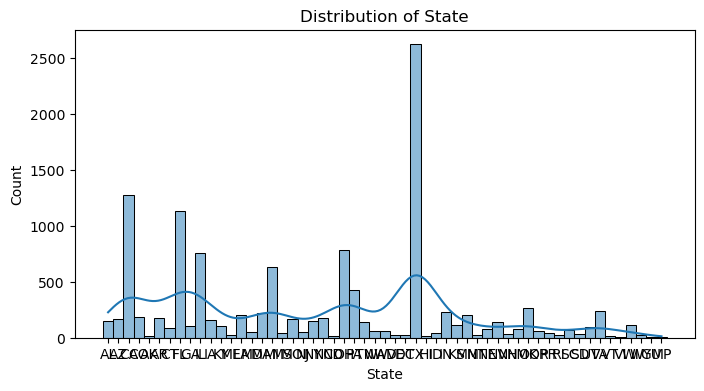

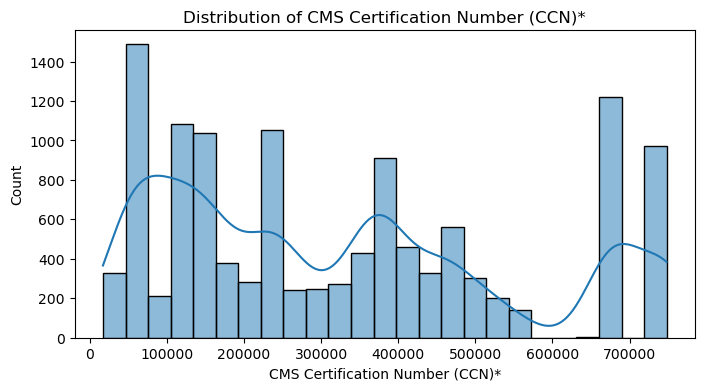

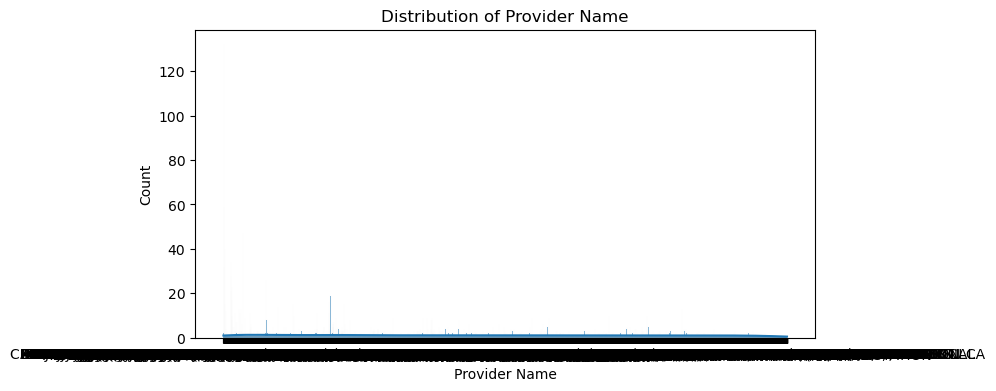

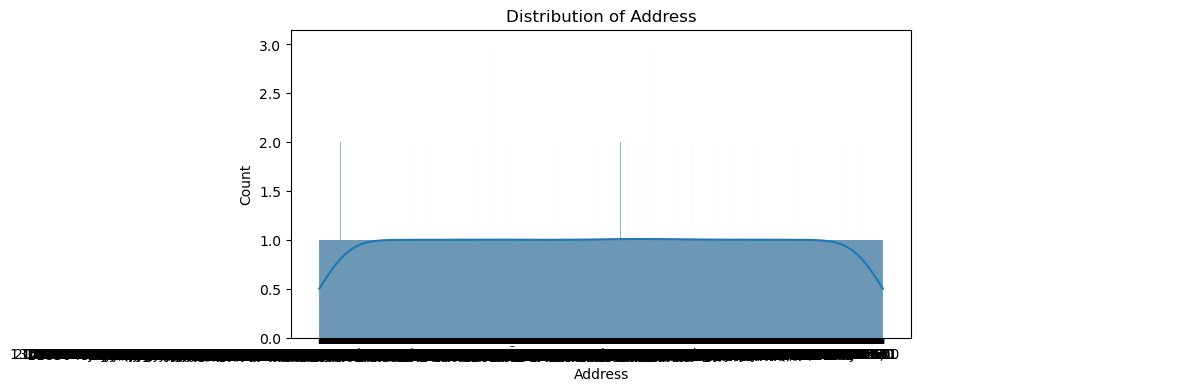

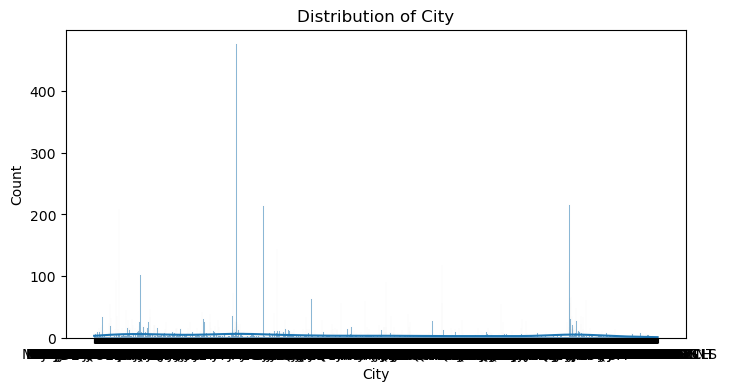

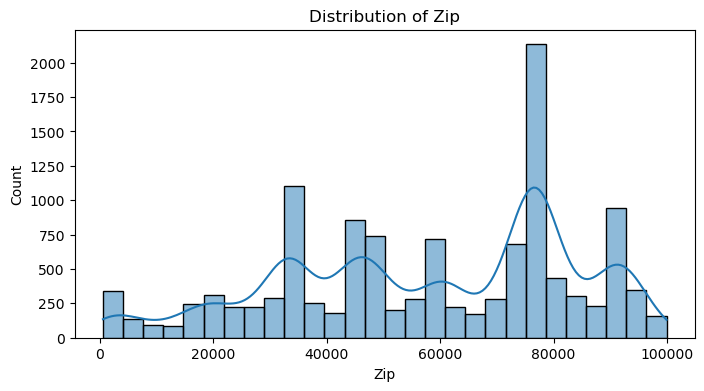

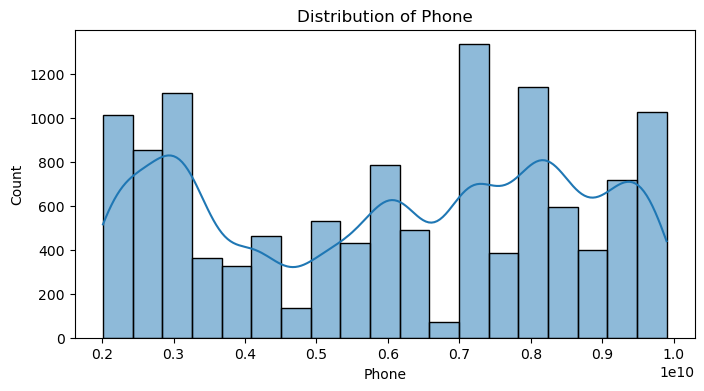

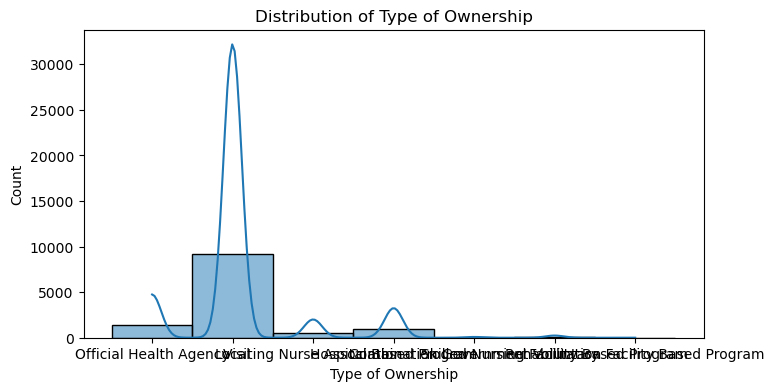

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


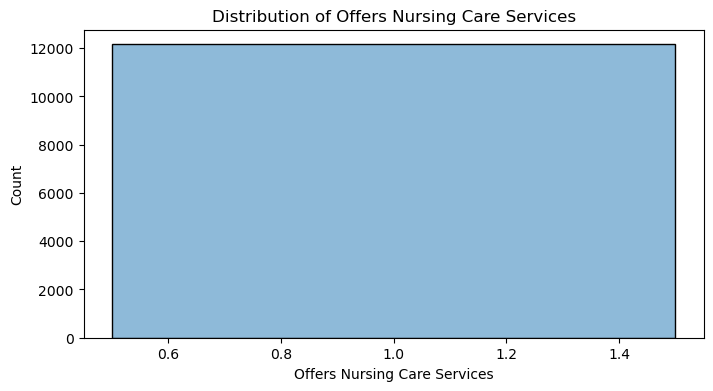

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


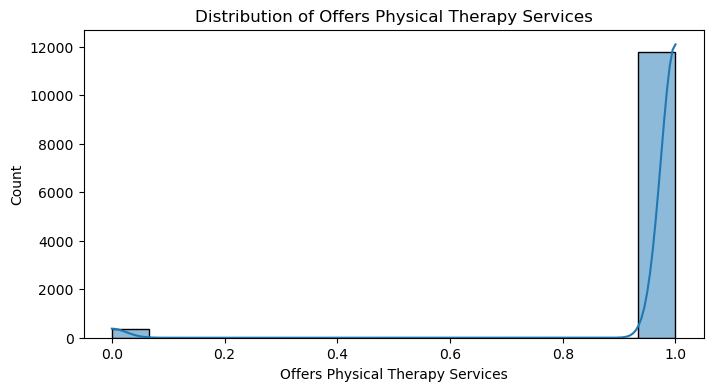

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


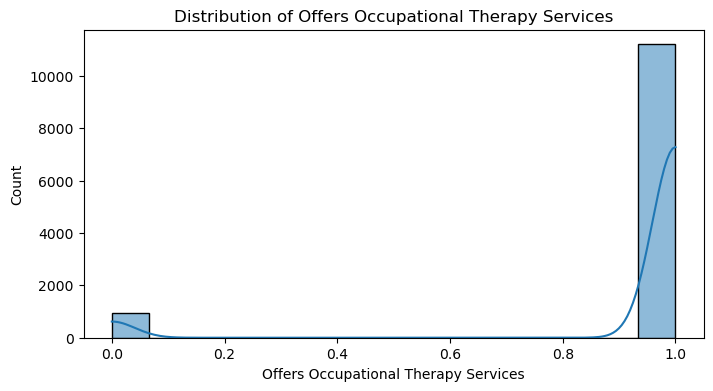

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


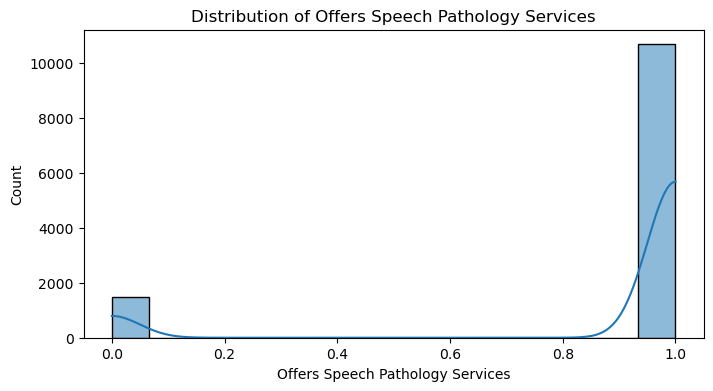

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


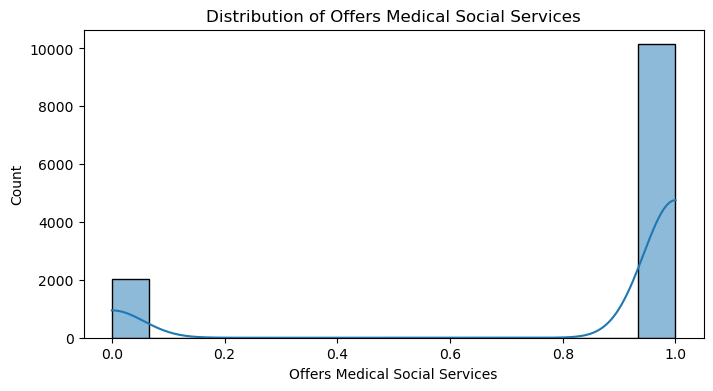

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


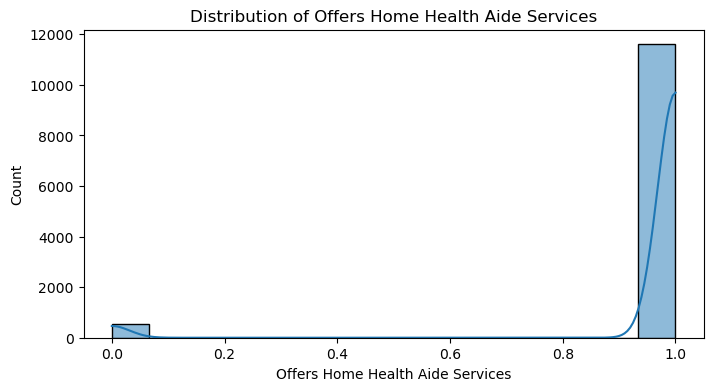

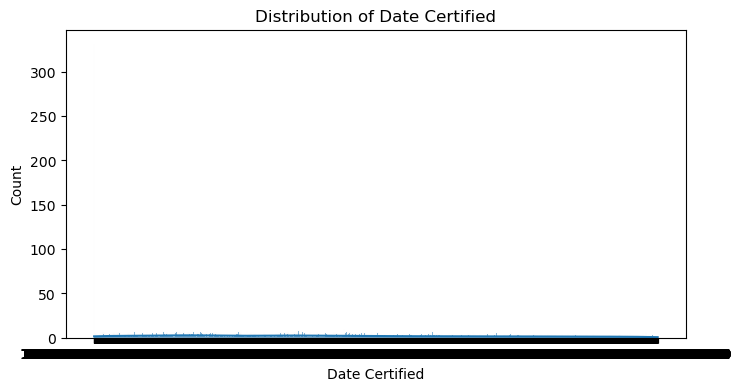

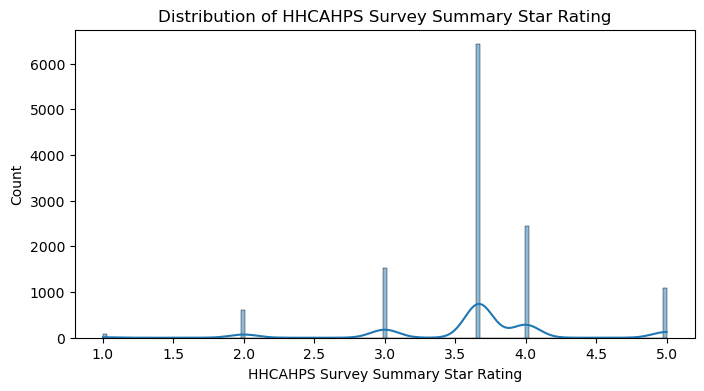

C:\Users\rinto\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


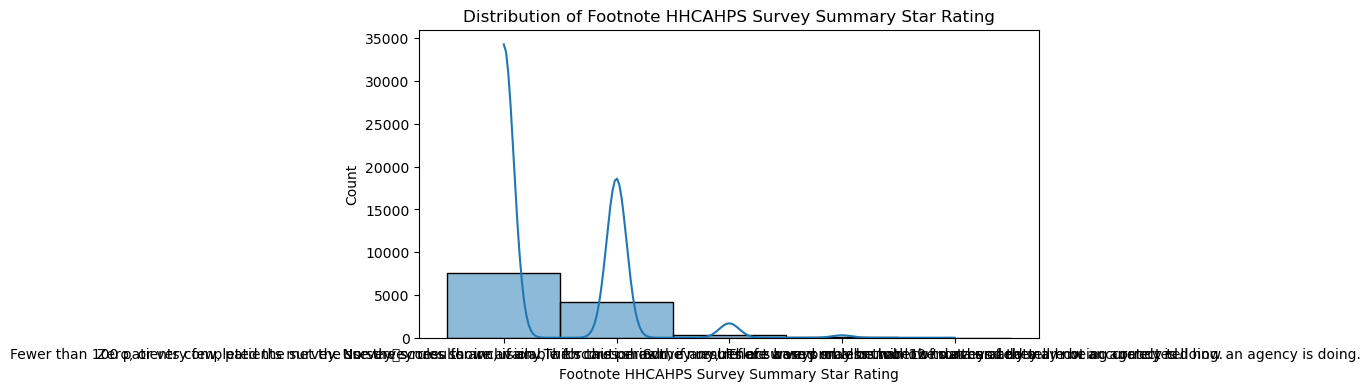

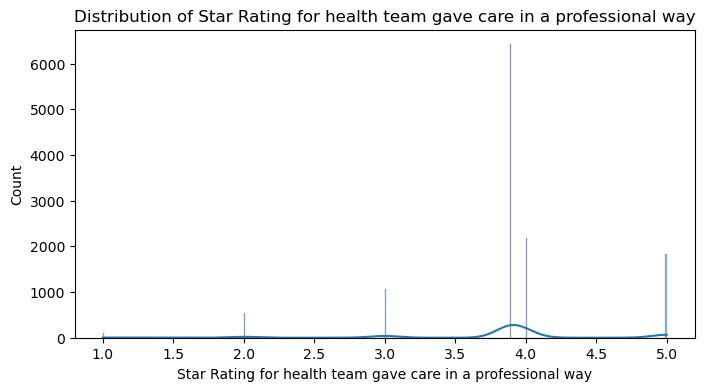

C:\Users\rinto\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


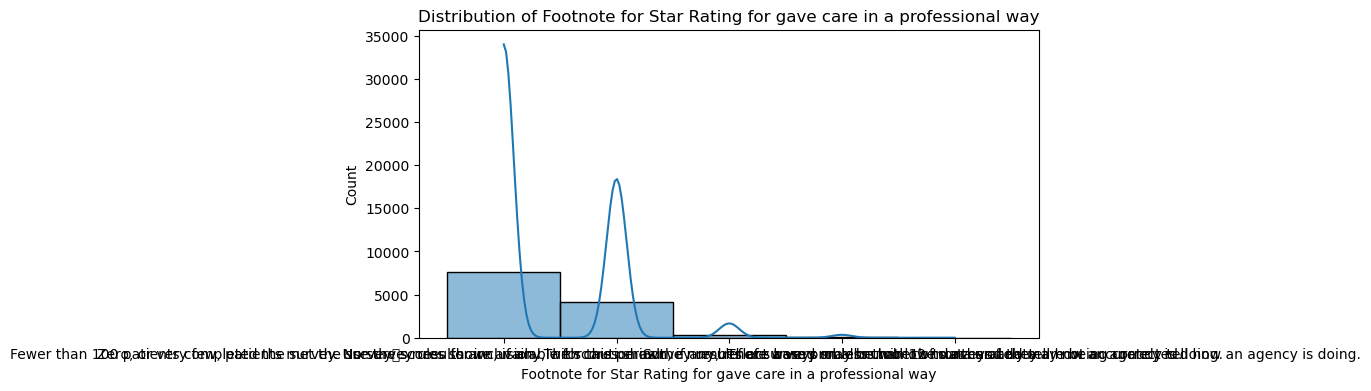

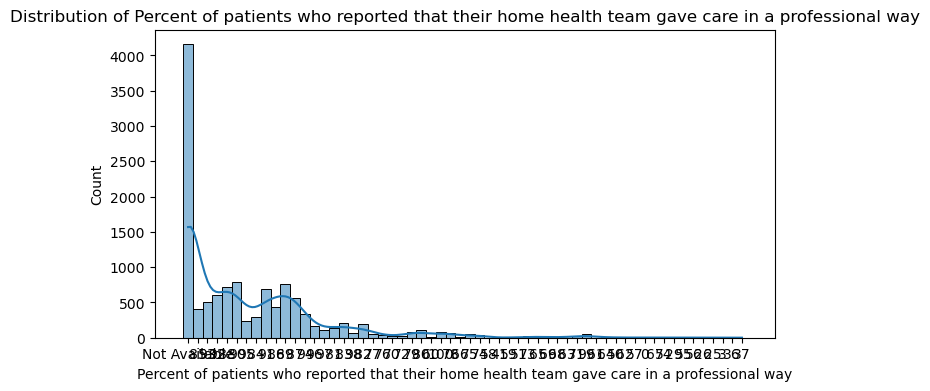

C:\Users\rinto\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


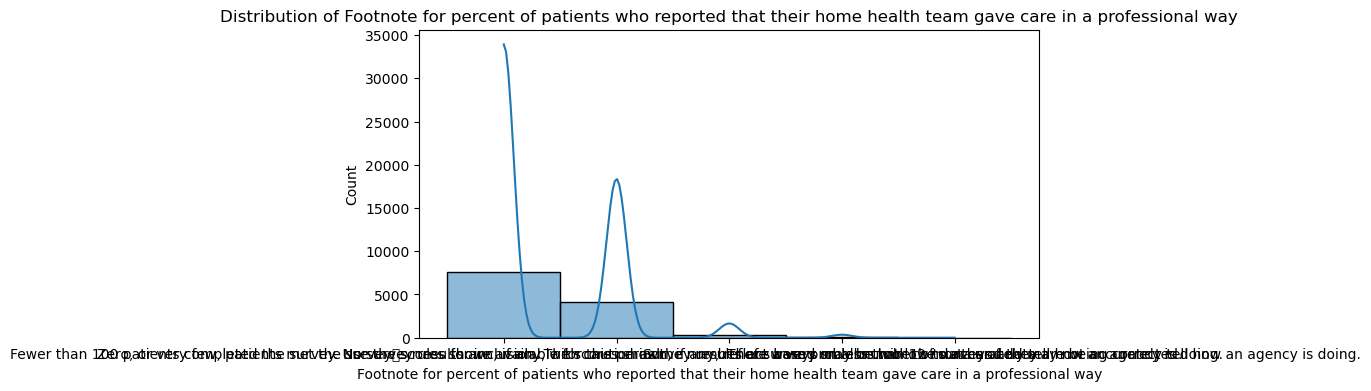

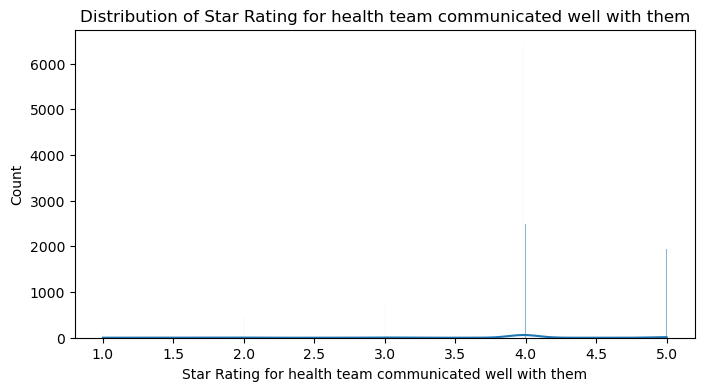

C:\Users\rinto\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


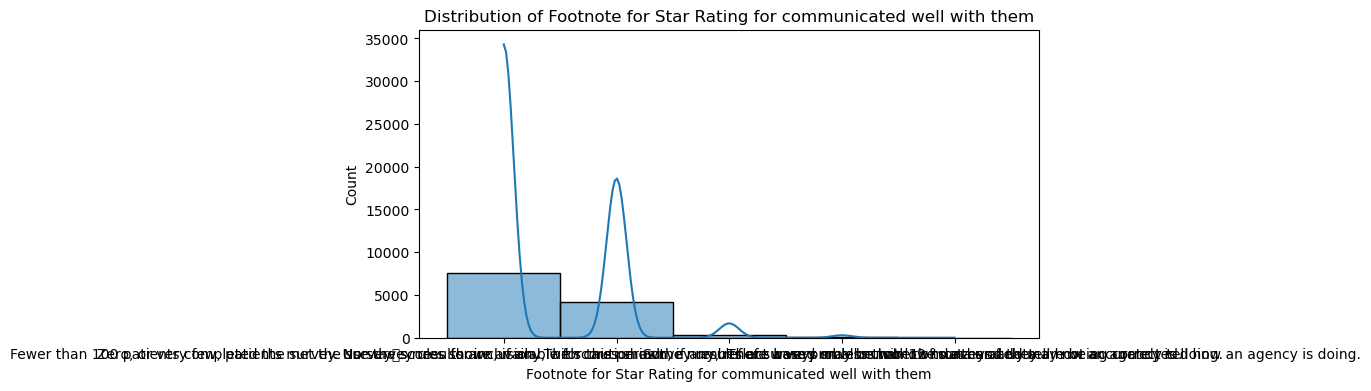

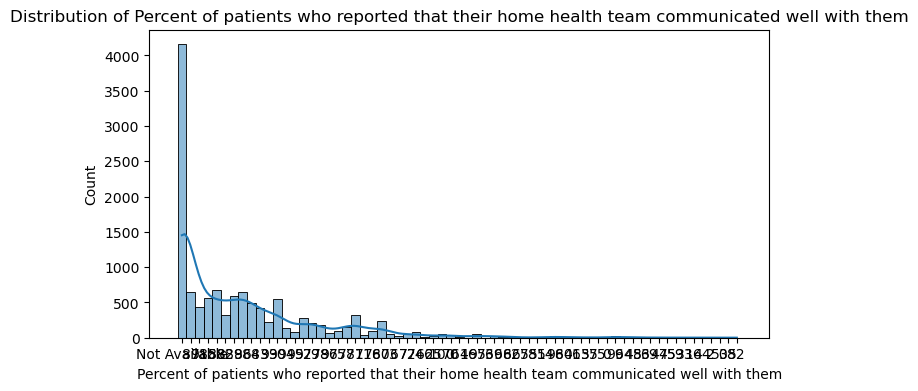

C:\Users\rinto\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


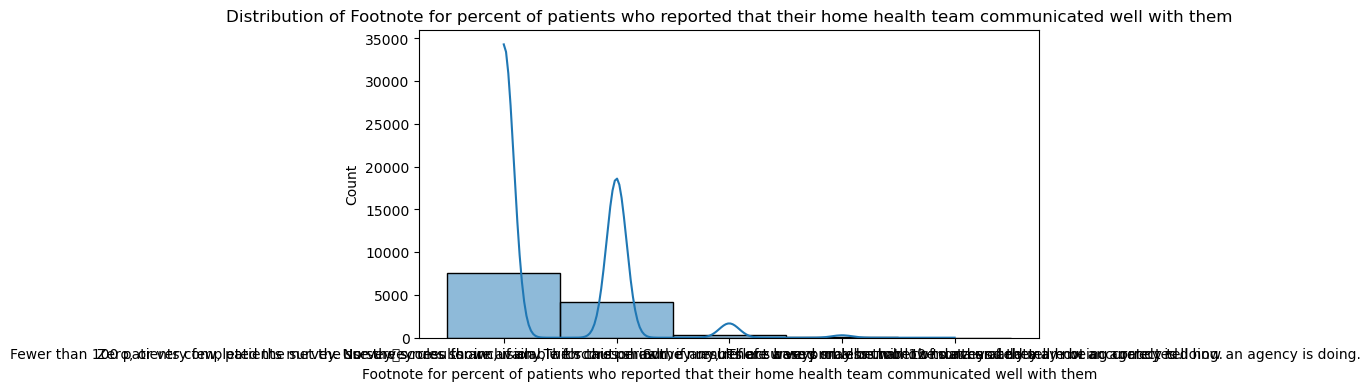

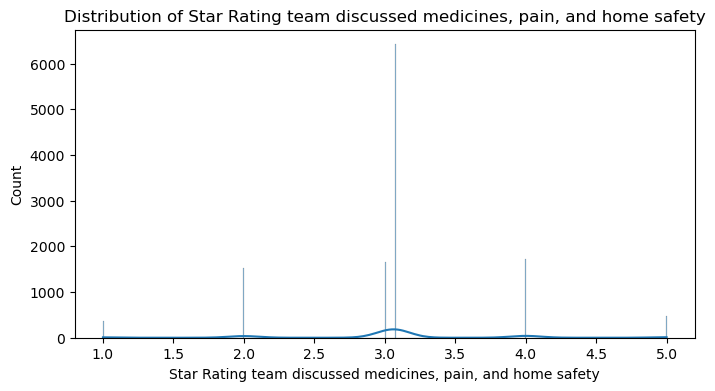

C:\Users\rinto\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


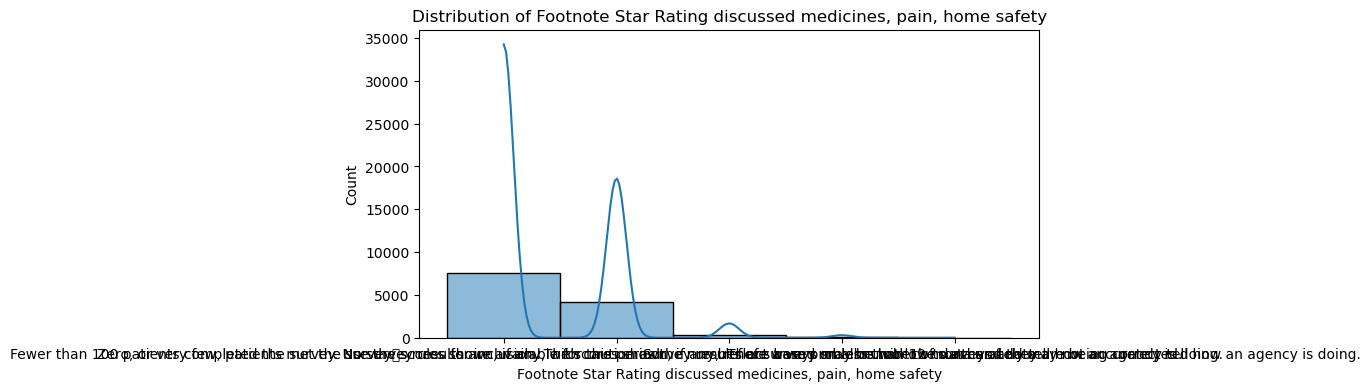

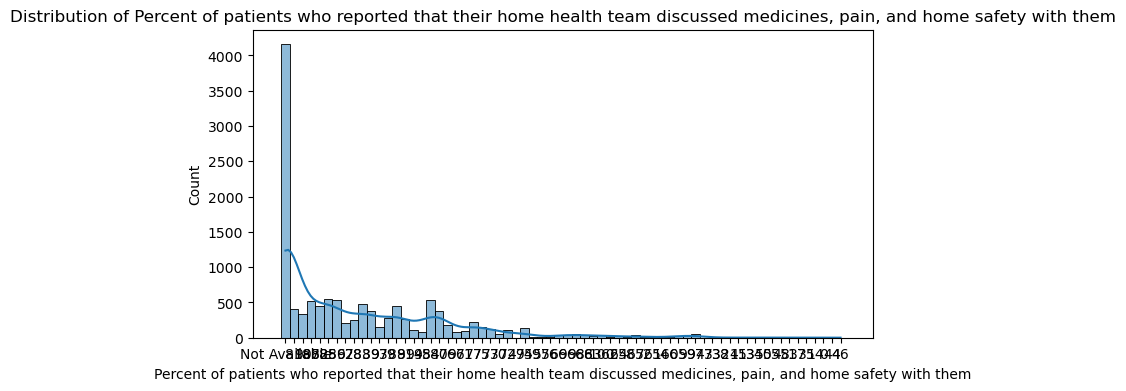

C:\Users\rinto\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


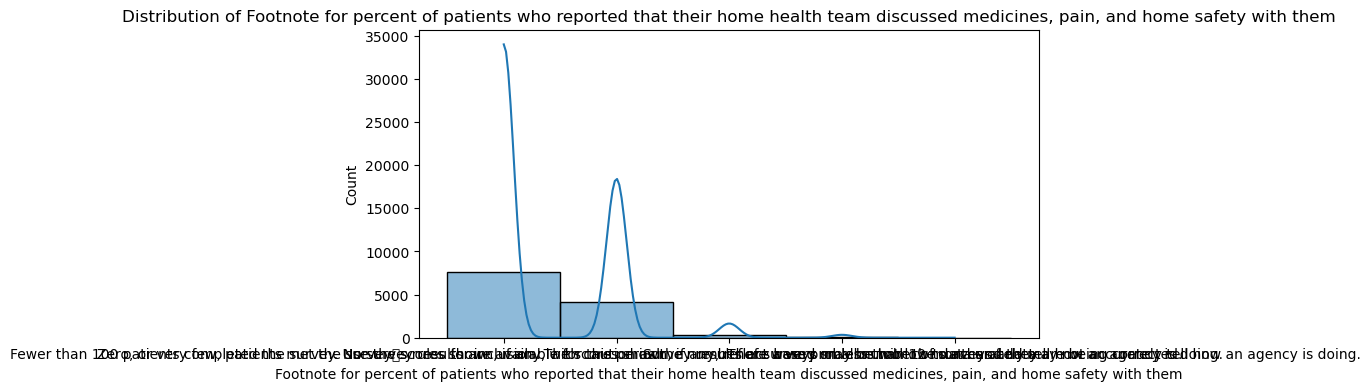

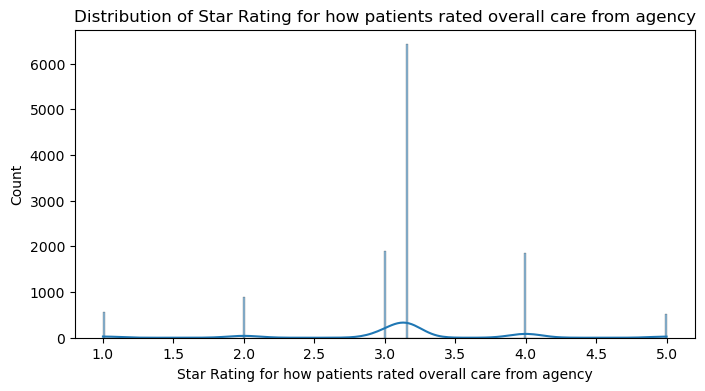

C:\Users\rinto\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


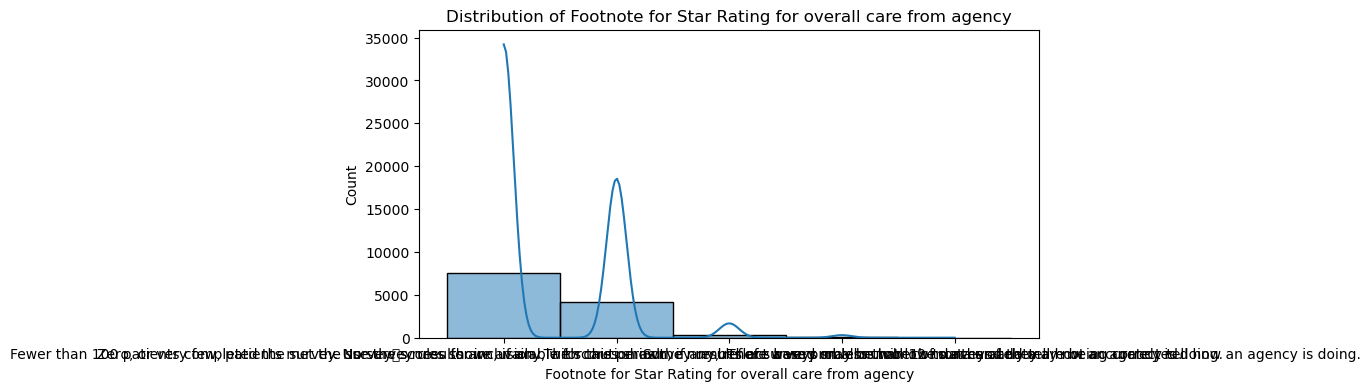

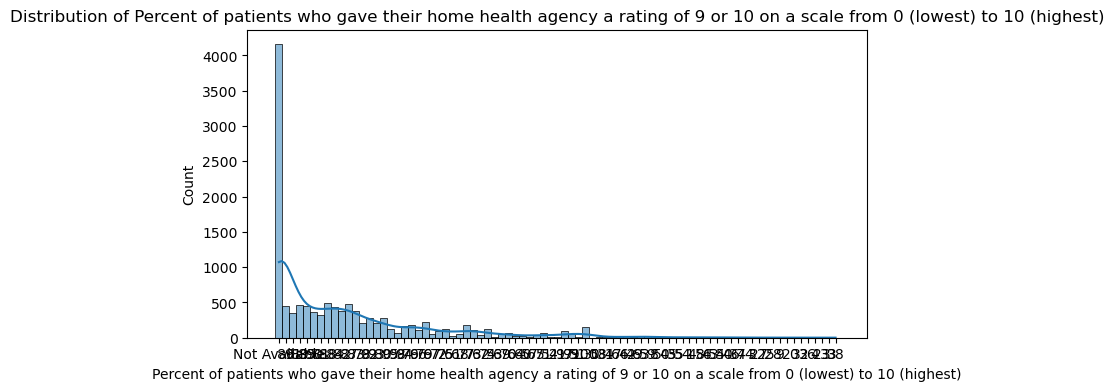

C:\Users\rinto\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


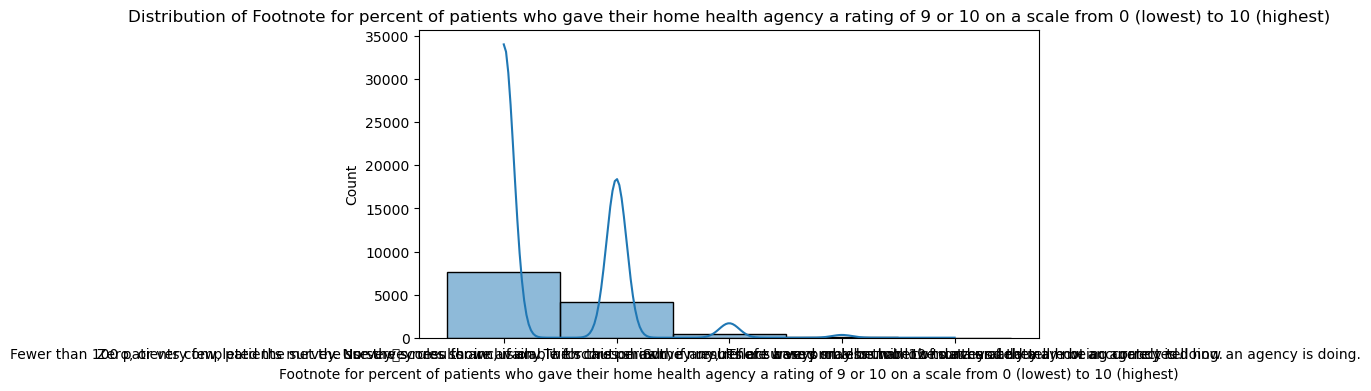

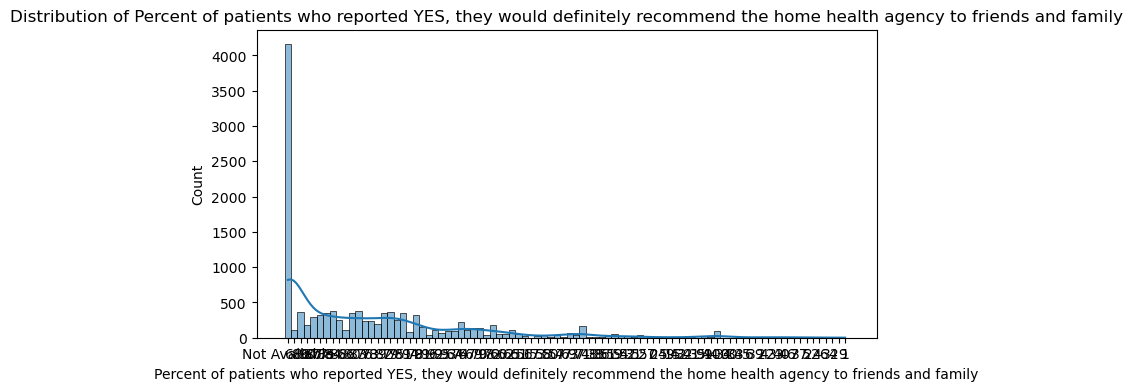

C:\Users\rinto\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


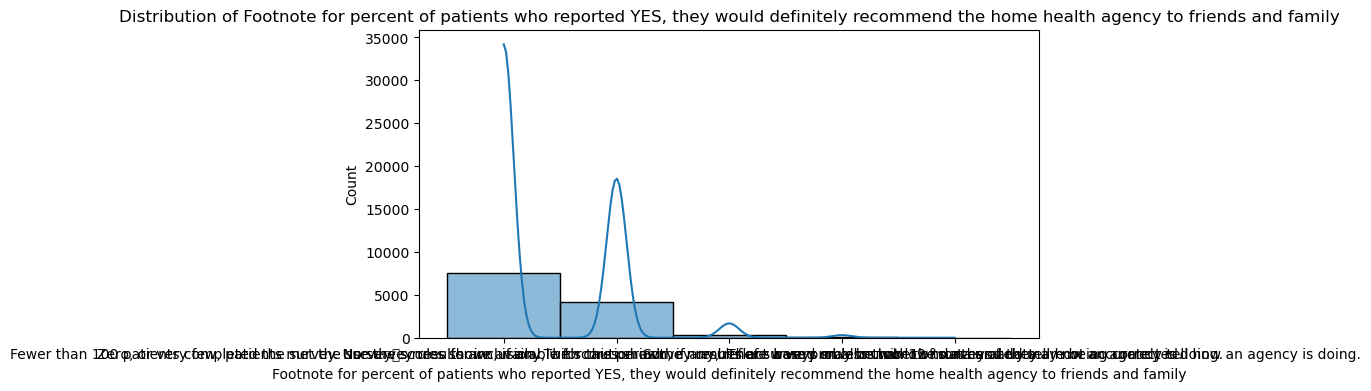

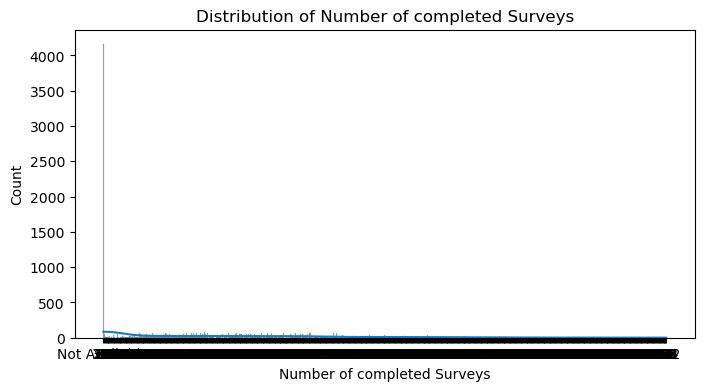

C:\Users\rinto\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


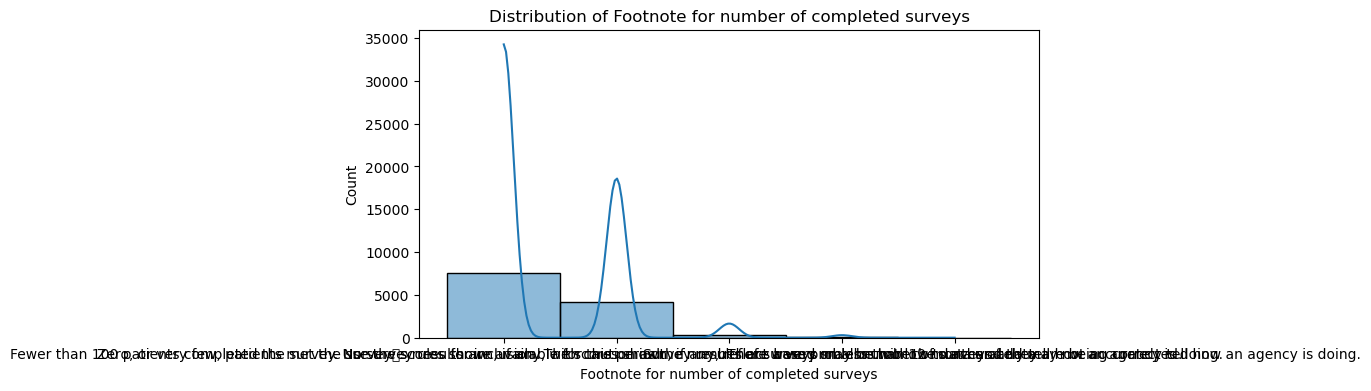

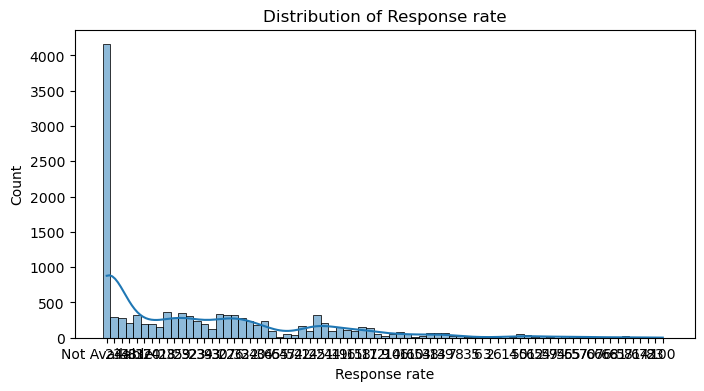

C:\Users\rinto\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


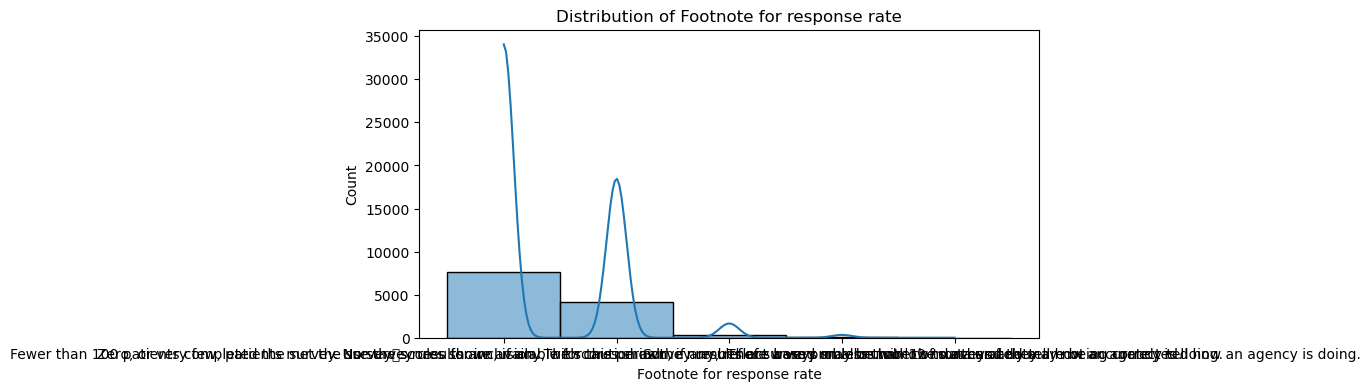

In [16]:
# Import required visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Univariate Analysis: Visualize individual features
for column in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()


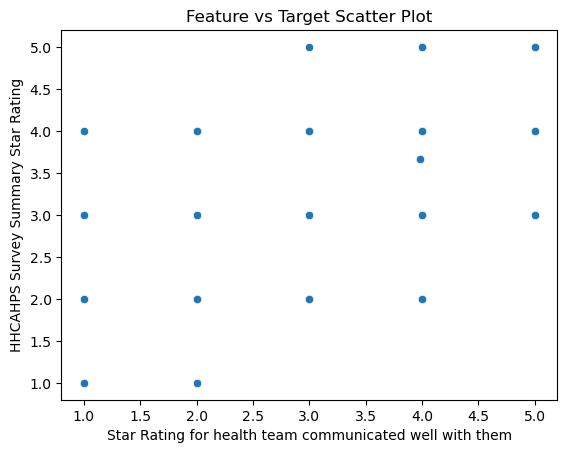

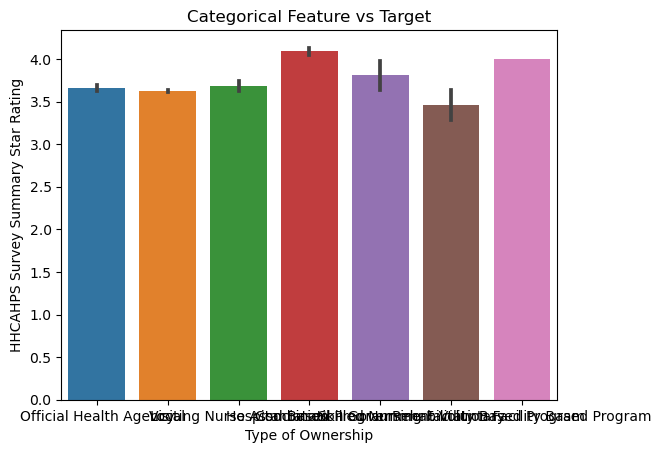

In [20]:
# 2. Bivariate Analysis: Visualize relationships between features and target
sns.scatterplot(x='Star Rating for health team communicated well with them', y='Star Rating for how patients rated overall care from agency', data=df)
plt.title("Feature vs Target Scatter Plot")
plt.show()

sns.barplot(x='Type of Ownership', y='Star Rating for how patients rated overall care from agency', data=df)
plt.title("Categorical Feature vs Target")
plt.show()


C:\Users\rinto\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

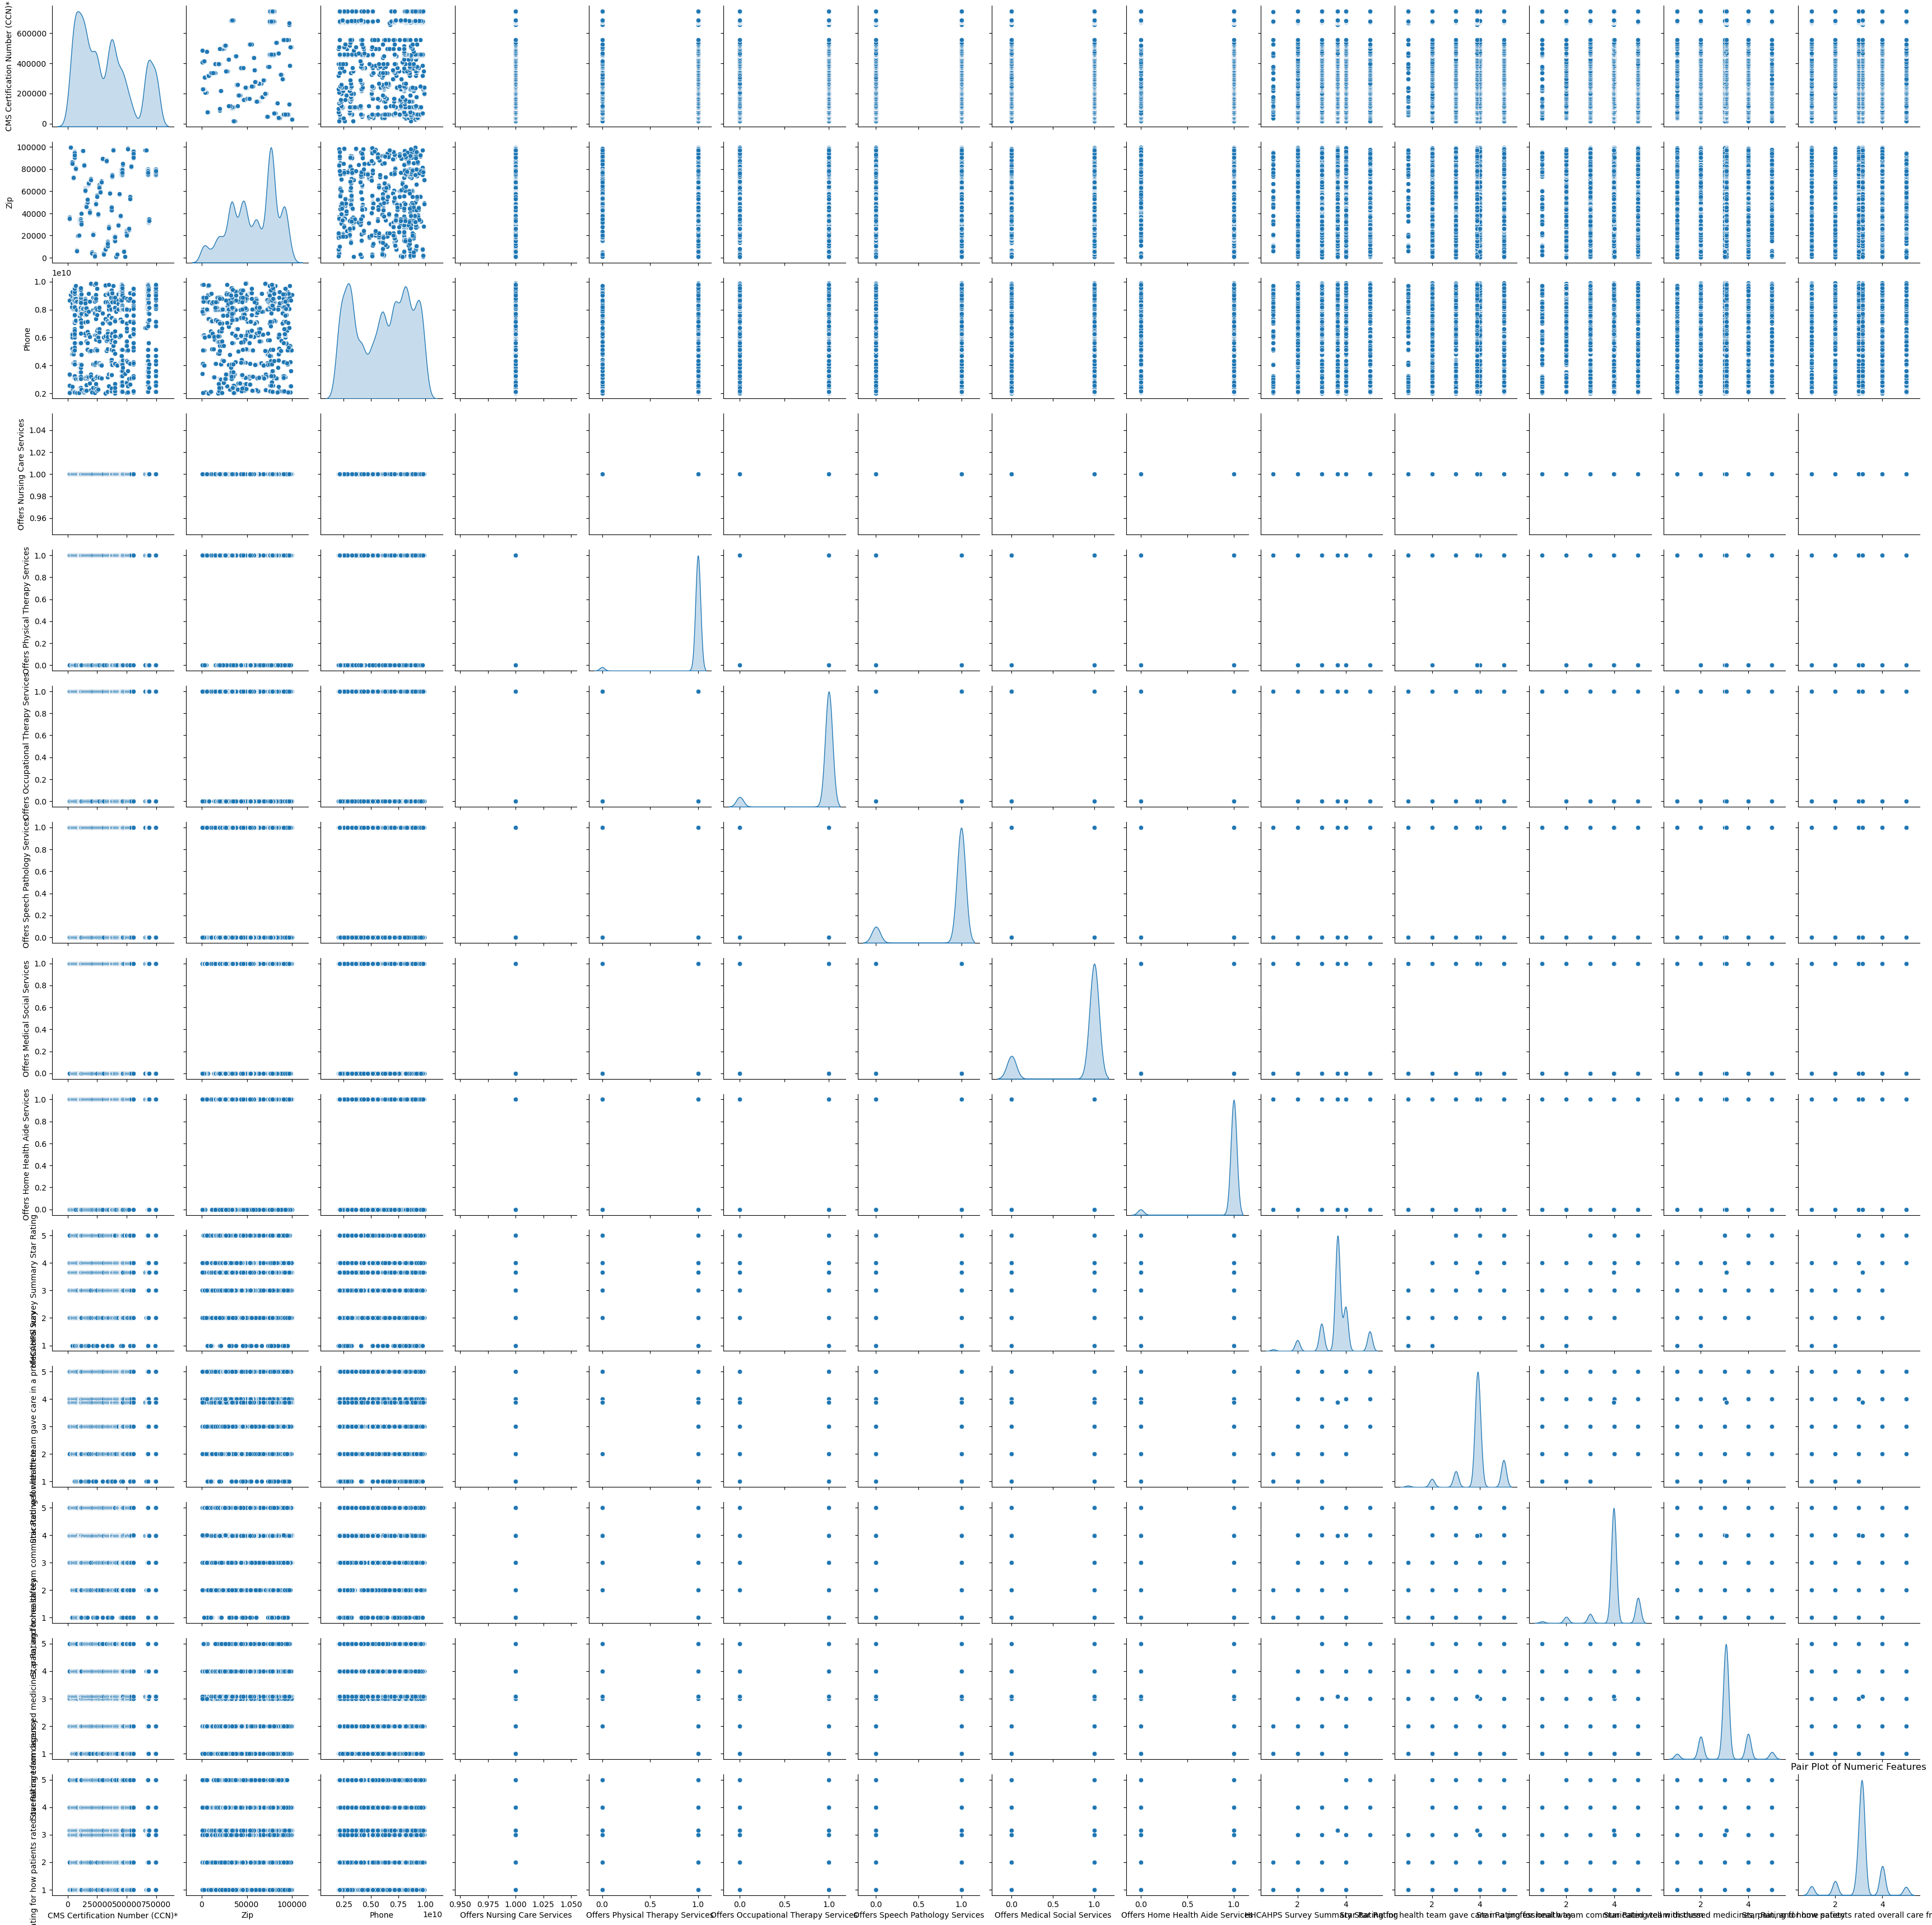

In [25]:
# Pairplot for numeric columns
plt.figure(figsize=(10, 8))
sns.pairplot(df, diag_kind='kde')  # This will show relationships between all pairs of numeric features
plt.title("Pair Plot of Numeric Features")
plt.show()

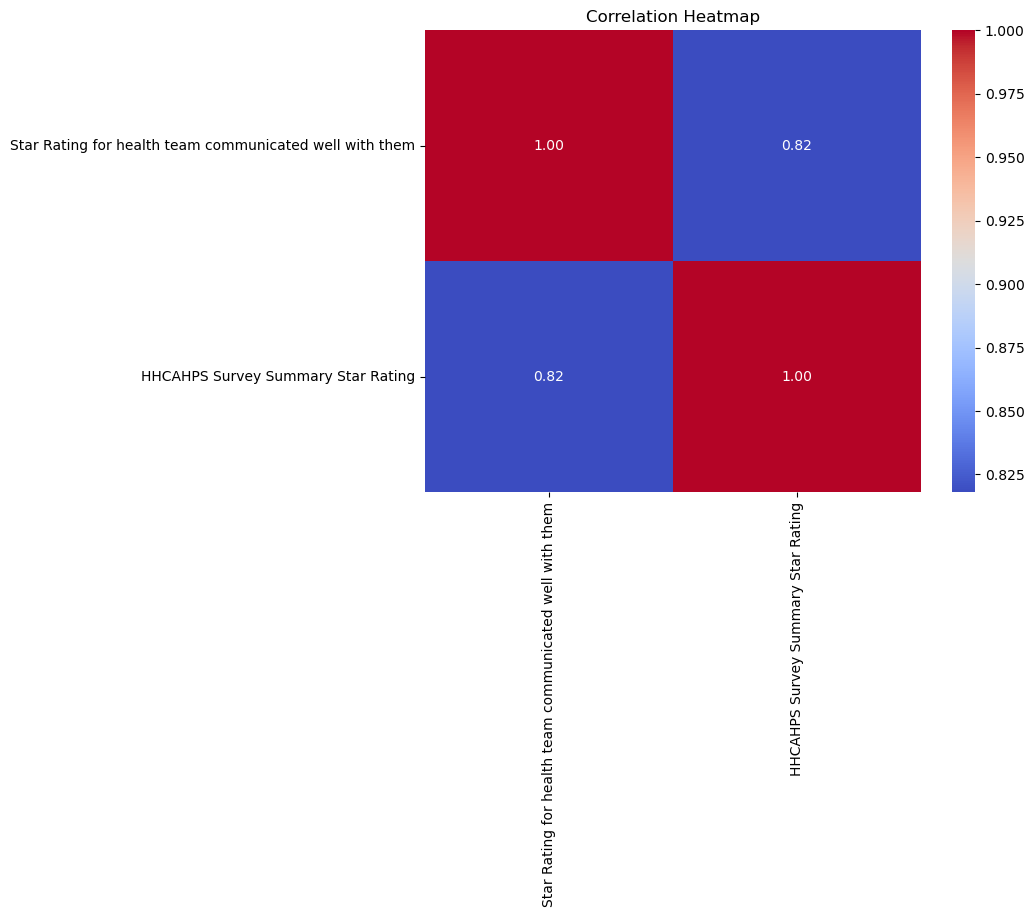

In [32]:
# Compute the correlation matrix
corr_matrix = df_encoded[['Star Rating for health team communicated well with them', 'HHCAHPS Survey Summary Star Rating']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\rinto\AppData\Local\Temp\ipykernel_13008\44230953.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


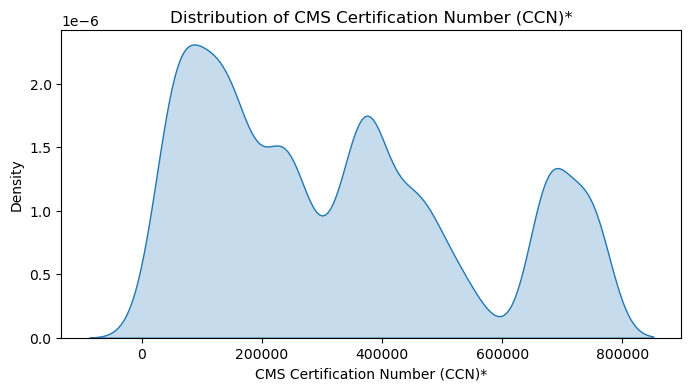

C:\Users\rinto\AppData\Local\Temp\ipykernel_13008\44230953.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


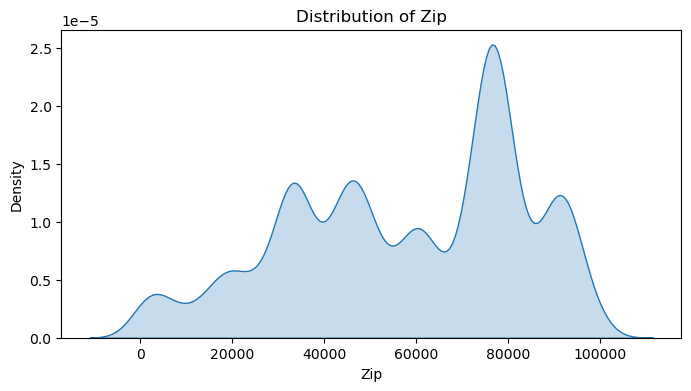

C:\Users\rinto\AppData\Local\Temp\ipykernel_13008\44230953.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


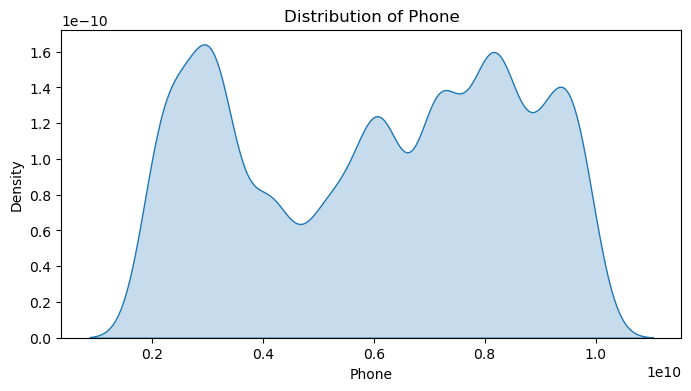

C:\Users\rinto\AppData\Local\Temp\ipykernel_13008\44230953.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


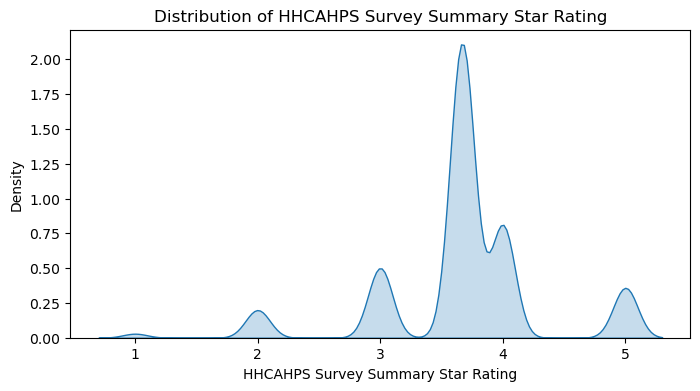

C:\Users\rinto\AppData\Local\Temp\ipykernel_13008\44230953.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


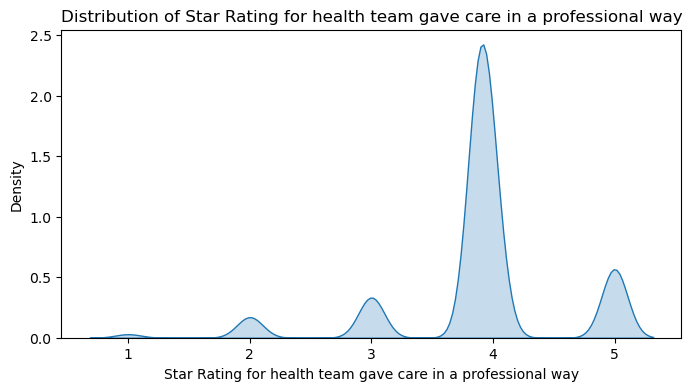

C:\Users\rinto\AppData\Local\Temp\ipykernel_13008\44230953.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


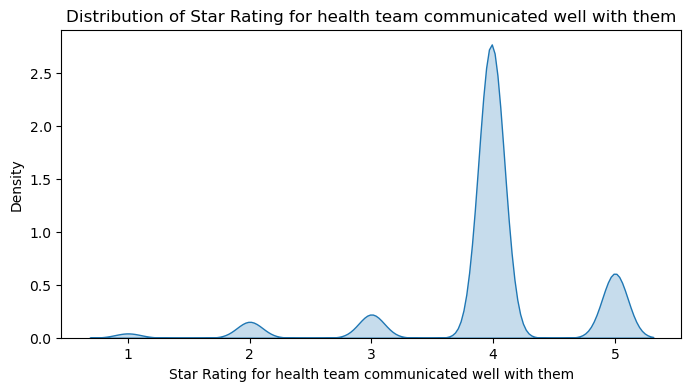

C:\Users\rinto\AppData\Local\Temp\ipykernel_13008\44230953.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


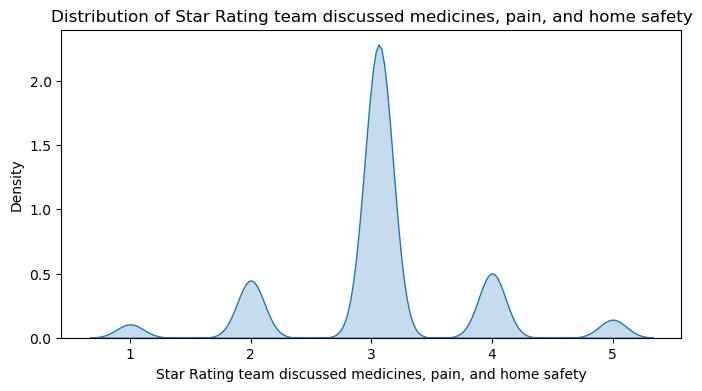

C:\Users\rinto\AppData\Local\Temp\ipykernel_13008\44230953.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


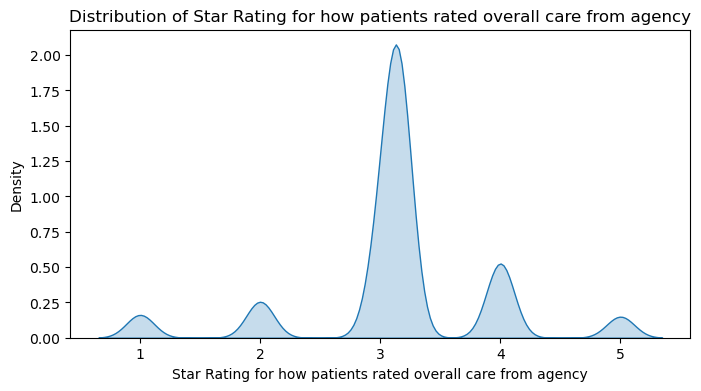

In [33]:
# 5. Distribution of Data using KDE plot
for column in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[column], shade=True)
    plt.title(f"Distribution of {column}")
    plt.show()